# 군집 분석

## K-means 군집

### 도매점에서의 고객 분류를 위한 군집 분류

In [33]:
### 기본 라이브러리 불러오기
import pandas as pd


# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
'''
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
'''

df = pd.read_csv('data/wholesale.csv')

# 데이터 살펴보기
print(df.head())   
print('\n')

print(df.info()) 
print('\n')

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None




In [34]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
5

In [35]:
#데이터 정규화
X = df.values
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

[[    2     3 12669  9656  7561   214  2674  1338]
 [    2     3  7057  9810  9568  1762  3293  1776]
 [    2     3  6353  8808  7684  2405  3516  7844]
 [    1     3 13265  1196  4221  6404   507  1788]
 [    2     3 22615  5410  7198  3915  1777  5185]]


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [36]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

# 모형 학습
kmeans.fit(X)   

# 예측(군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 1 4 1 4 1 0 3 4 4 1 1 4 0 1 1 1 0 1 4 0
 4 4 0 0 1 4 4 4 4 4 2 4 4 1 1 0 4 0 1 2 4 1 1 4 2 4 4 1 2 1 4 1 1 0 0 1 4
 4 0 1 4 1 1 1 4 4 1 4 2 2 0 1 0 1 0 2 0 4 1 4 1 1 1 4 4 4 0 1 1 4 4 4 4 1
 4 0 1 1 1 1 1 0 1 1 1 1 4 0 0 0 4 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 4 1 1
 1 0 1 1 1 1 1 4 4 1 4 4 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4 0 1 1 1 1 3 1 3 1
 1 1 1 4 4 0 1 1 4 1 0 0 4 1 1 4 4 0 1 1 4 1 4 1 4 1 2 1 1 4 1 4 1 4 1 1 1
 1 4 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 0 0 1 1 1 1 4 1 1 1 1 1 2 1 0 1 0 1 1 0
 0 1 1 1 1 4 1 4 1 4 1 1 1 1 0 1 1 0 0 1 4 1 4 0 0 0 0 1 0 1 0 1 1 1 4 1 4
 1 4 4 1 4 4 4 4 4 4 4 1 1 4 1 0 4 1 1 4 1 1 1 4 1 1 1 1 0 3 1 1 0 1 1 4 1
 2 0 4 1 1 1 1 4 4 1 4 1 1 4 4 1 4 1 4 1 4 1 1 0 4 1 1 1 1 1 1 1 4 1 1 1 1
 0 0 1 4 1 1 4 0 1 4 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 4 1 1 1 1 0 0 0 1 1 0
 4 4 1 1 1 1 0 1 4 4 1 4 1 1 4 0 4 4 0 1 0 1 1 1 0 1 1 1 0 0 4 1 1]




In [37]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        4  
1        1776        4  
2        7844        4  
3        1788        1  
4        5185        4  




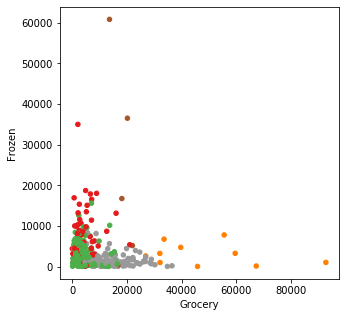

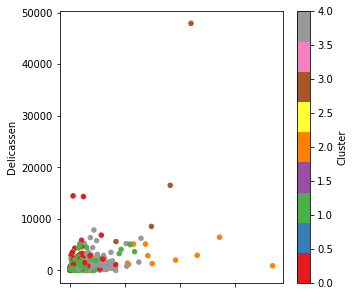

In [38]:
import matplotlib.pyplot as plt
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(5, 5))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(5, 5))
plt.show()
plt.close()

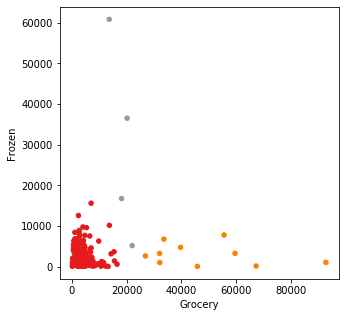

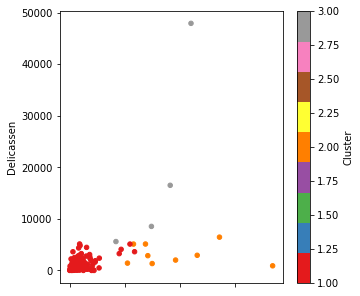

In [39]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(5, 5))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(5, 5))
plt.show()
plt.close()

#### k-means++ 알고리즘

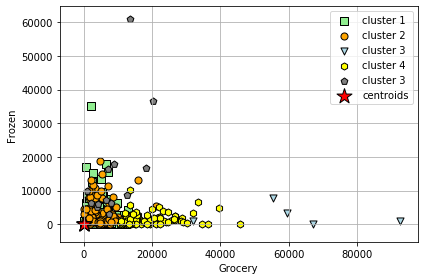

In [40]:
X = df.values
# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
y_km = kmeans.fit_predict(X)

X = X[:, 4:6]

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='yellow',
            marker='h', edgecolor='black',
            label='cluster 4')
plt.scatter(X[y_km == 4, 0],
            X[y_km == 4, 1],
            s=50, c='gray',
            marker='p', edgecolor='black',
            label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.grid()
plt.tight_layout()
plt.show()

#### 엘보우 방법을 사용한 최적의 클러스터 찾기

In [41]:
#왜곡 확인
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster
# 모형 객체 생성 
kmeans = cluster.KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
# 모형 학습
y_km = kmeans.fit_predict(X)
print('왜곡: %.2f' % kmeans.inertia_)

왜곡: 72.48


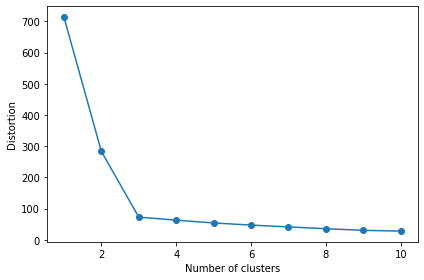

In [42]:
#1-10개로 cluster 의 개수를 높이면서 왜곡의 값을 확인
distortions = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

#### 실루엣 그래프를 이용한 최적의 클래스터 개수 구하기

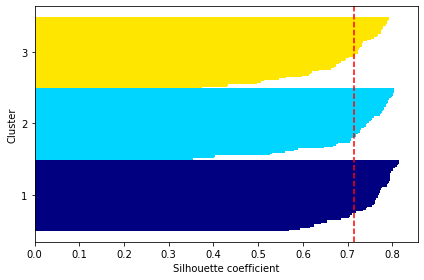

In [43]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = cluster.KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

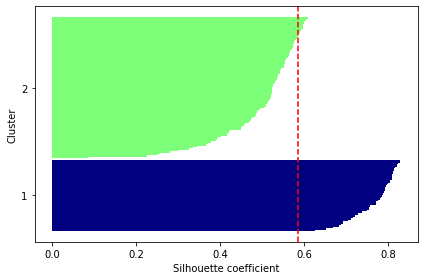

In [44]:
km = cluster.KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

## DBScan Clustering

### 군집 알고리즘 비교

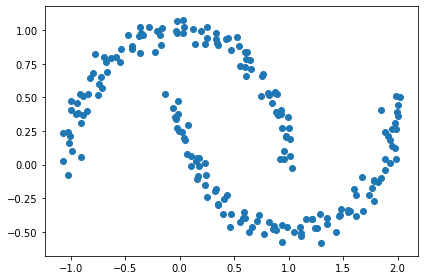

In [45]:
#반달 모양의 데이터 생성 및 확인
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

#### k-means clustering

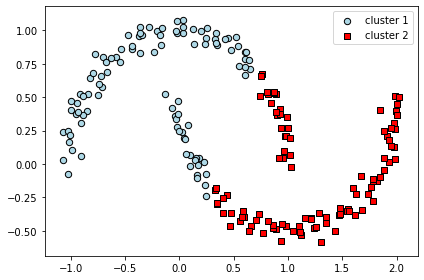

In [46]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

#### DBScan clustering(과학고, 외고, 자사고)

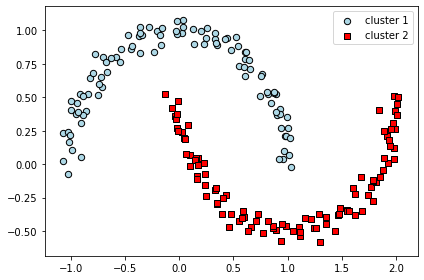

In [47]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

#### 중학교 클러스터링

In [48]:
### 기본 라이브러리 불러오기
import pandas as pd

'''
엑셀 데이터 읽어오기
'''
df = pd.read_excel('data/middle_school_report.xlsx', header=0)

# 데이터 출력
print(df.head())   
print('\n')

# 열 이름 배열을 출력
print(df.columns.values)   
print('\n')

Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  여학생수    일반고   특성화고  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277     0  0.585  0.148   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0   256  0.680  0.199   
2           2  강남구             개원중학교   3  공립  주간   170   152  0.817  0.047   
3           3  강남구             개포중학교   3  공립  주간    83    72  0.755  0.097   
4           4  서초구             경원중학교   3  공립  주간   199   212  0.669  0.017   

   ...  외고_국제고  예고_체고  마이스터고    자사고    자공고   기타진학  취업     미상         위도  \
0  ...   0.007  0.000  0.011  0.227  0.000  0.004   0  0.000  37.594942   
1  ...   0.035  0.008  0.000  0.043  0.004  0.031   0  0.000  37.577473   
2  ...   0.012  0.003  0.006  0.090  0.003  0.009   0  0.003  37.491637   
3  ...   0.013  0.019  0.019  0.065  0.000  0.019   0  0.000  37.480439   
4  ...   0.010  0.005  0.000  0.282  0.000  0.010   0  0.000  37.510750   

           경도  
0  127.038909  
1  127.003857  
2  127.071744  
3  127.062201  
4  

In [49]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
Unnamed: 0    415 non-null int64
지역            415 non-null object
학교명           415 non-null object
코드            415 non-null int64
유형            415 non-null object
주야            415 non-null object
남학생수          415 non-null int64
여학생수          415 non-null int64
일반고           415 non-null float64
특성화고          415 non-null float64
과학고           415 non-null float64
외고_국제고        415 non-null float64
예고_체고         415 non-null float64
마이스터고         415 non-null float64
자사고           415 non-null float64
자공고           415 non-null float64
기타진학          415 non-null float64
취업            415 non-null int64
미상            415 non-null float64
위도            415 non-null float64
경도            415 non-null float64
dtypes: float64(12), int64(5), object(4)
memory usage: 68.2+ KB
None


       Unnamed: 0          코드        남학생수        여학생수         일반고        특성화고  \
count  415.000000  415

In [50]:
#지도 의존성을 위한 라이브러리
import folium
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)

# 지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [51]:
# 원핫인코딩(더미 변수)
#문자 데이터를 숫자 데이터로 변환
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   
print('\n')

Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  여학생수    일반고   특성화고  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277     0  0.585  0.148   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0   256  0.680  0.199   
2           2  강남구             개원중학교   3  공립  주간   170   152  0.817  0.047   
3           3  강남구             개포중학교   3  공립  주간    83    72  0.755  0.097   
4           4  서초구             경원중학교   3  공립  주간   199   212  0.669  0.017   

   ...    자공고   기타진학  취업     미상         위도          경도  location  code  type  \
0  ...  0.000  0.004   0  0.000  37.594942  127.038909        16     0     1   
1  ...  0.004  0.031   0  0.000  37.577473  127.003857        22     0     1   
2  ...  0.003  0.009   0  0.003  37.491637  127.071744         0     0     0   
3  ...  0.000  0.019   0  0.000  37.480439  127.062201         0     0     0   
4  ...  0.000  0.010   0  0.000  37.510750  127.008900        14     0     0   

   day  
0    0  
1    0  
2    0  
3    0  
4    0  

In [52]:
# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

특성화고    과학고  마이스터고
0  0.148  0.018  0.011
1  0.199  0.000  0.000
2  0.047  0.009  0.006
3  0.097  0.013  0.019
4  0.017  0.007  0.000




In [53]:
# 설명 변수 데이터를 정규화
X_train = preprocessing.StandardScaler().fit(X).transform(X)
print(X_train)

[[-0.01637623  2.02375287  0.76167223]
 [ 0.47947907 -0.65047921 -0.69559254]
 [-0.99836417  0.68663683  0.09927916]
 ...
 [-1.45532886 -0.65047921 -0.69559254]
 [-1.45532886 -0.65047921 -0.69559254]
 [-1.27059845 -0.65047921  0.62919362]]


In [54]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X_train)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1 -1  6  3 -1  6 -1 -1 -1  0 -1  0 10 -1  0  0  0 -1  0 -1
 -1 -1 -1  9 -1 -1 10  0 10  0  7  7  3  6 -1 -1 -1 -1  3  4 -1  0 -1  8
  4  8  6  0  7 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1

In [55]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

Unnamed: 0   지역               학교명  코드  유형  주야  남학생수  여학생수    일반고   특성화고  \
0           0  성북구    서울대학교사범대학부설중학교   3  국립  주간   277     0  0.585  0.148   
1           1  종로구  서울대학교사범대학부설여자중학교   3  국립  주간     0   256  0.680  0.199   
2           2  강남구             개원중학교   3  공립  주간   170   152  0.817  0.047   
3           3  강남구             개포중학교   3  공립  주간    83    72  0.755  0.097   
4           4  서초구             경원중학교   3  공립  주간   199   212  0.669  0.017   

   ...   기타진학  취업     미상         위도          경도  location  code  type  day  \
0  ...  0.004   0  0.000  37.594942  127.038909        16     0     1    0   
1  ...  0.031   0  0.000  37.577473  127.003857        22     0     1    0   
2  ...  0.009   0  0.003  37.491637  127.071744         0     0     0    0   
3  ...  0.019   0  0.000  37.480439  127.062201         0     0     0    0   
4  ...  0.010   0  0.000  37.510750  127.008900        14     0     0    0   

   Cluster  
0       -1  
1        0  
2       -1  
3       -1  


In [56]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key : -1
* number : 234
   Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
0           0  성북구   3  0.148  0.018  0.011
2           2  강남구   3  0.047  0.009  0.006
3           3  강남구   3  0.097  0.013  0.019
6           6  강남구   3  0.015  0.015  0.000
7           7  강남구   3  0.000  0.032  0.000


* key : 0
* number : 70
    Unnamed: 0   지역  코드   특성화고  과학고  마이스터고
1            1  종로구   3  0.199  0.0    0.0
13          13  서초구   3  0.032  0.0    0.0
23          23  강남구   3  0.025  0.0    0.0
28          28  서초구   3  0.040  0.0    0.0
29          29  강남구   3  0.051  0.0    0.0


* key : 1
* number : 7
    Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
4            4  서초구   3  0.017  0.007    0.0
24          24  강남구   3  0.026  0.007    0.0
27          27  강남구   3  0.006  0.006    0.0
53          53  강동구   3  0.020  0.007    0.0
68          68  송파구   3  0.011  0.007    0.0


* key : 2
* number : 6
    Unnamed: 0   지역  코드   특성화고    과학고  마이스터고
8            8  강남구   3  0.018  0.013    0.0
12          12  

In [64]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name,
                        tooltip=name
    ).add_to(cluster_map)

# 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')

KeyError: 11

##### DBScan clustering(과학고, 외고, 자사고, 학교유형)

In [ ]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

##### 과학고와 외고 만을 이용해서 군집 수행

In [ ]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

In [ ]:
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

In [ ]:
cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')